## Assignment 1: Linear Regression [30 pt]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the dataset into training and testing sets
# You may use train_test_split in sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #test size is set to 20% and random state is set to 42

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for evaluation
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)

# Interpret the coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error: 2900.193628493482
Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995


Here, the test data is split in 20% and random state is set to a random number 42 first. Then linear regression model is set and fit into the training dataset. y_pred is the predictions on the test dataset. After the predictions are done mse is calculated to determine how good is the prediction on the test data. The mse is calculated and printed afterwards along with the coefficients.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


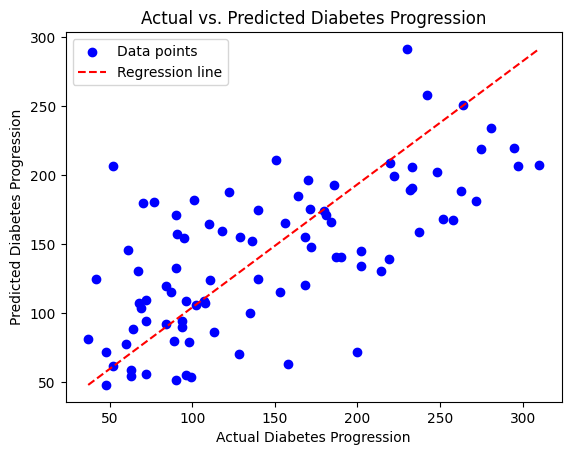

In [ ]:
# Visualize the model's performance with the regression line
plt.scatter(y_test, y_pred, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', label='Regression line')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Actual vs. Predicted Diabetes Progression')
plt.legend()
plt.show()


For the visualizations, the comparison is done with the y_test data points and the y_pred data points to determine the model’s performance. Each data points represents an actual data from test set y_test against the predicted data point y_pred. According to the visuals of this model, the data points are moderately clustered around the regression line, with a few loosely lying outliers. That means the model is performing at average and has scopes to improve the predictions.

## Assignment 2: Logistic Regression [40 pt]

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Implement Logistic Regression algorithm
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features) #weights set to zero
    bias = 0 #bias set to zero

    for _ in range(num_iterations):
        #linear model
        linear_model = np.dot(X, weights) + bias #linear model is used to have the raw prediction first
        #apply sigmoid function
        y_predicted = sigmoid(linear_model) #sigmoid function is used to get predicted probabilities

        # get the prediction from the model, update the parameters.

        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) #dot product of transpose of feature matrix X and the differences between predicted and actual values is then multiplied by the average of samples.
        db = (1 / n_samples) * np.sum(y_predicted - y) #gradient against biases

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


# Train Logistic Regression model
learning_rate = 0.01
num_iterations = 1000
weights, bias = logistic_regression(X_train_scaled, y_train, learning_rate, num_iterations)

# Predict class labels using trained model
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias #linear combination of inputs, weights and plus bias
    y_predicted = sigmoid(linear_model) #sigmoid fucntion for getting predicted probalities
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted] #converts predicted probalities into class labels. Values greater than 0.5 are classified as 1 and values less than 0.5 as 0
    return np.array(y_predicted_cls)


In [ ]:
y_pred = predict(X_test_scaled, weights, bias)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9859154929577465
Recall: 0.9859154929577465
F1 Score: 0.9859154929577465


## Assignment 3: K-Means [30 pt]

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
# Load the Iris dataset
data = load_iris()
X = data.data

In [ ]:
# Implement K-Means algorithm
def kmeans(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters): #used to update the centroids
        # Assign each data point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2)) #calculates distance between each data points and centroids
        labels = np.argmin(distances, axis=0) #assigns each data points to the nearest centroid

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)]) #new centroids calculated by the mean of all data points assigned to one centroidoids atre

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids


    return labels, centroids

In [ ]:
# Apply K-Means with k=3 (since there are three species of iris)
k = 3
labels, centroids = kmeans(X, k)

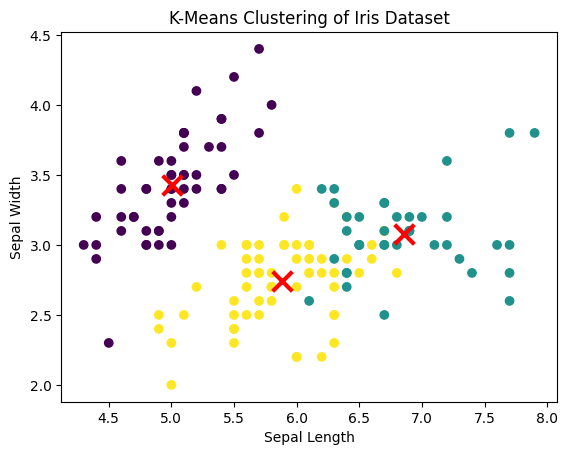

In [ ]:
# Visualize the clustered data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels)  # Color points based on cluster labels; X[:, 0] selects the length of data points on X axis and X[:, 1] selects the width on the Y axis
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')  # Plot centroids
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()